In [ ]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_excel("C:/data/cap/data_r.xlsx")

In [3]:
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,92532.0,289256.0,2021-09-20,서초구,-,감염경로 조사중,NaN
1,92531.0,287537.0,2021-09-20,노원구,-,감염경로 조사중,NaN
2,92530.0,289090.0,2021-09-20,서초구,-,기타 확진자 접촉,NaN
3,92529.0,289021.0,2021-09-20,강서구,-,감염경로 조사중,NaN
4,92528.0,288931.0,2021-09-20,타시도,-,송파구 소재 시장 관련('21.9.),NaN
...,...,...,...,...,...,...,...
92764,5.0,9.0,2020-01-31,성북구,-,기타 확진자 접촉,퇴원
92765,4.0,7.0,2020-01-30,마포구,중국,해외유입,퇴원
92766,3.0,6.0,2020-01-30,종로구,-,종로구 집단발병,퇴원
92767,2.0,5.0,2020-01-30,중랑구,중국,해외유입,퇴원


<AxesSubplot:title={'center':'한글 제목'}>

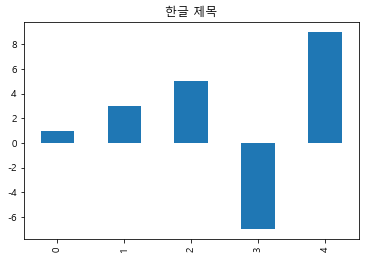

In [4]:
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic") # Windows
plt.rc("axes", unicode_minus=False) 

# test
pd.Series([1,3,5,-7,9]).plot.bar(title="한글 제목")

In [5]:
df["확진일"] = pd.to_datetime(df["확진일"])
df["년"] = df["확진일"].dt.year
df["월"] = df["확진일"].dt.month
df["주"] = df["확진일"].dt.week

# test
df[["확진일", "년", "월", "주"]]

<ipython-input-5-6f7bd527ed0e>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["주"] = df["확진일"].dt.week


,확진일,년,월,주
0,2021-09-20,2021.0,9.0,38.0
1,2021-09-20,2021.0,9.0,38.0
2,2021-09-20,2021.0,9.0,38.0
3,2021-09-20,2021.0,9.0,38.0
4,2021-09-20,2021.0,9.0,38.0
...,...,...,...,...
92764,2020-01-31,2020.0,1.0,5.0
92765,2020-01-30,2020.0,1.0,5.0
92766,2020-01-30,2020.0,1.0,5.0
92767,2020-01-30,2020.0,1.0,5.0


### 확진일 별 확진자수 추이

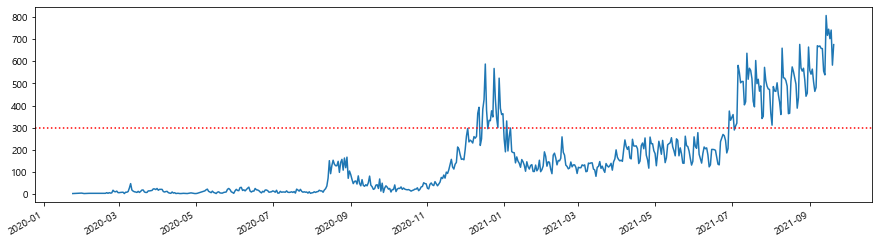

In [6]:
df["확진일"].value_counts().sort_index().plot(figsize=(15,4))
#수평선 위치 설정 
plt.axhline(300, color='red', linestyle=":")

- 2020년 8월 이후에 확진자가 눈에 띄게 증가하였습니다. 


- 2020년 9월 이후에 확진자가 점점 줄어들다가 12월 이후에 큰 폭으로 증가하였습니다. 

- 2020년 12월 이후, 600명에 이르는 확진자가 다시 줄어들고 300명이하(빨간선)을 유지하였습니다

- 2021년 7월 이후 다시 큰 폭으로 증가하였으며, 역대 최고치를 돌파하였습니다.

### 확진자 수 제일 많은 날 접촉력 데이터 빈도수  

In [7]:
#확진일 별 확진자수
day_count = df["확진일"].value_counts().sort_index()
day_count


2020-01-24      1
2020-01-30      3
2020-01-31      3
2020-02-02      1
2020-02-05      2
             ... 
2021-09-16    746
2021-09-17    703
2021-09-18    742
2021-09-19    583
2021-09-20    676
Name: 확진일, Length: 574, dtype: int64

In [8]:
#전체 데이터에서 가장 많이 발생한 날 
day_count_max=day_count[day_count == day_count.max()]
day_count_max

2021-09-14    808
Name: 확진일, dtype: int64

<AxesSubplot:>

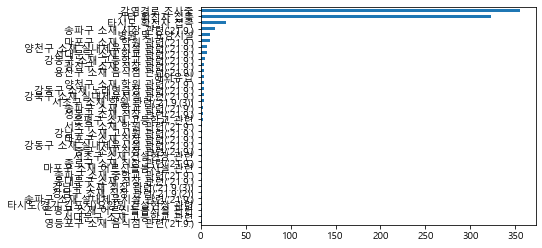

In [9]:
#2021년 9월 14일, 접촉력 데이터 빈도수 
#데이터 수집시점(21일)이어서 아직 감염경로 조사중으로 나타났다. 
df[df["확진일"]=='2021-09-14']["접촉력"].value_counts().sort_values().plot.barh()

### 월별 확진자수 추이 

<AxesSubplot:xlabel='월'>

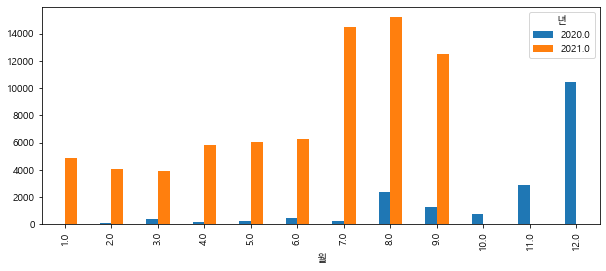

In [10]:

df.groupby(["월", "년"])["연번"].count().unstack().plot.bar(figsize=(10,4))

In [11]:
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,주
0,92532.0,289256.0,2021-09-20,서초구,-,감염경로 조사중,NaN,2021.0,9.0,38.0
1,92531.0,287537.0,2021-09-20,노원구,-,감염경로 조사중,NaN,2021.0,9.0,38.0
2,92530.0,289090.0,2021-09-20,서초구,-,기타 확진자 접촉,NaN,2021.0,9.0,38.0
3,92529.0,289021.0,2021-09-20,강서구,-,감염경로 조사중,NaN,2021.0,9.0,38.0
4,92528.0,288931.0,2021-09-20,타시도,-,송파구 소재 시장 관련('21.9.),NaN,2021.0,9.0,38.0
...,...,...,...,...,...,...,...,...,...,...
92764,5.0,9.0,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020.0,1.0,5.0
92765,4.0,7.0,2020-01-30,마포구,중국,해외유입,퇴원,2020.0,1.0,5.0
92766,3.0,6.0,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020.0,1.0,5.0
92767,2.0,5.0,2020-01-30,중랑구,중국,해외유입,퇴원,2020.0,1.0,5.0


In [12]:
first_day = df.iloc[-1, 2]
last_day = df.iloc[0, 2]
days = pd.date_range(first_day, last_day)
df_days = pd.DataFrame({"확진일자": days})
df_days #총 606일 

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28
...,...
601,2021-09-16
602,2021-09-17
603,2021-09-18
604,2021-09-19


In [13]:
#확진자 발생날짜 별 확진자수 
daily_case = df["확진일"].value_counts()
df_daily_case = daily_case.to_frame()
df_daily_case.columns = ["확진수"]
df_daily_case

,확진수
2021-09-14,808
2021-09-16,746
2021-09-18,742
2021-09-15,718
2021-09-17,703
...,...
2020-05-01,1
2020-04-24,1
2020-01-24,1
2020-04-15,1


In [14]:
#생성한 데이터프레임을 병함, 확진자가 발생하지 않은날은 NaN
all_days = df_days.merge(df_daily_case, left_on="확진일자", right_index=True, how='left')
all_days

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN
...,...,...
601,2021-09-16,746.0
602,2021-09-17,703.0
603,2021-09-18,742.0
604,2021-09-19,583.0


### 누적확진자수 그래프

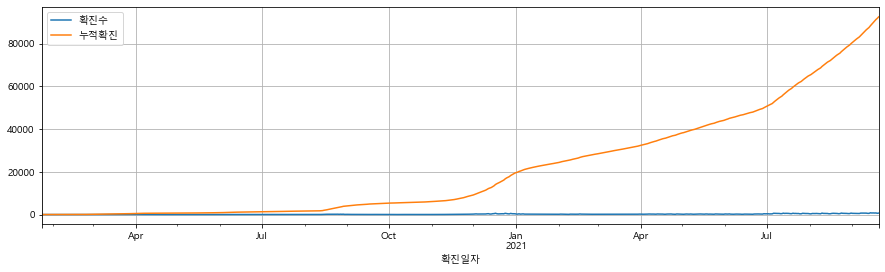

In [15]:
all_days["확진수"] = all_days["확진수"].fillna(0)
all_days["누적확진"] = all_days["확진수"].cumsum()
cum_day = all_days.set_index("확진일자")

# 시각화
cum_day.plot(figsize=(15,4))
plt.grid(True)

- 2020년 8월 이전까지 누적확진자가 천천히 증가하며,  그 이후로 증가폭이 다소 상승합니다. 
 
- 2020년 12월 이후로 증가폭이 더욱 더 상승하며, 2021년부터는 증가폭이 매우 가파르게 상승합니다. 

**누적 확진자수와 확진자수의 차이가 크기 때문에 로그 스케일로 변환하여 분석**

C:\Users\kimjm\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


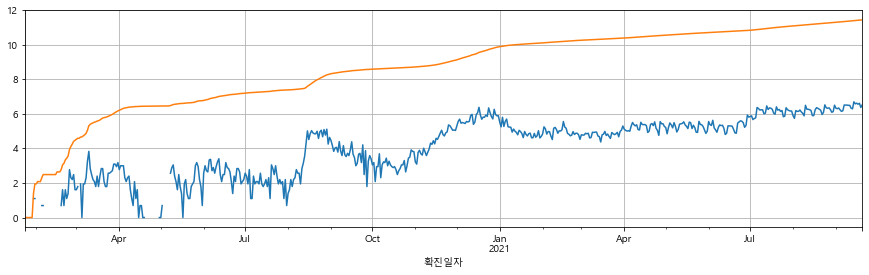

In [16]:
np.log(cum_day["확진수"]).plot(figsize=(15,4))
np.log(cum_day["누적확진"]).plot()
plt.grid(True)

 ### 거주지별 확진자 분석


In [17]:
df["거주지"].unique()

array(['서초구', '노원구', '강서구', '타시도', '중구', '강동구', '강북구', '광진구', '양천구',
       '송파구', '동작구', '은평구', '성북구', '동대문구', ' 성북구', ' 강동구', '구로구', '서대문구',
       '금천구', '중랑구', '강남구', '종로구', '성동구', '용산구', '영등포구', '도봉구', '마포구',
       '관악구', '기타', nan], dtype=object)

<AxesSubplot:>

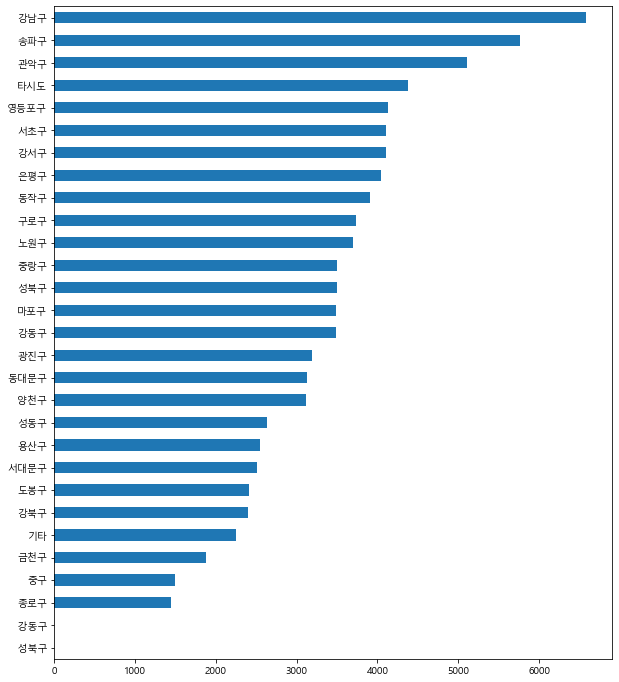

In [18]:
gu_etc_count = df["거주지"].value_counts()
gu_etc_count.sort_values().plot.barh(figsize=(10,12))

- '기타' 및 '타시도'는 거주지가 서울이 아니지만, 서울에서 확진 판정을 받은 환자입니다.


- '강남구'로 분류된 곳에 거주하는 확진자가 가장 많으며, 서울 이외에 '타시도'에 거주하는 확진자도 적지 않음을 알 수 있습니다. 만약 이 환자들이 무증상이었더라면, 더 넓은 지역 사회로 번질 가능성도 있었음을 추론할 수 있습니다.

###  접촉력 별 확진자 분석

<AxesSubplot:>

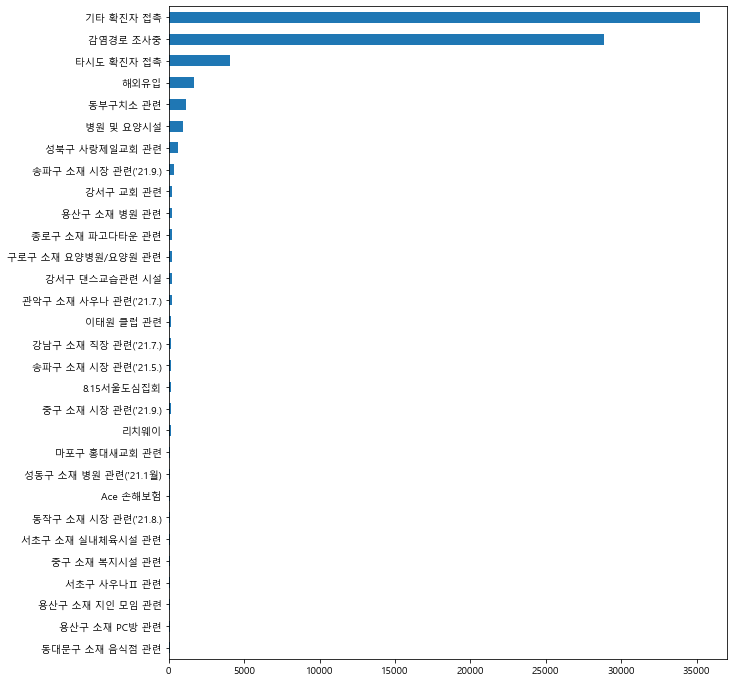

In [19]:
contact_count_top = df["접촉력"].value_counts().sort_values().tail(30)
contact_count_top.plot.barh(figsize=(10,12))

- 기타 확진자 접촉이 제일 많다는 것은 지역사회 n차 감염이 큰 확산세의 원인인 것을 알 수 있습니다 

- 감염경로 조사중인 경우가 2위인데, 이것은 역학조사중이거나 역학조사의 한계가 있음을 유추해 볼 수 있습니다. 

- 위 두가지 문제에 대한 해결책이 여전히 필요합니다. 

### (월, 접촉력 )별 확진자 분석

In [20]:
top_group = df[df["접촉력"].isin(contact_count_top.tail(15).index)]

In [21]:
# 2020년
top_group_2020 = top_group[top_group["년"]==2020].groupby(["접촉력", "월"])["연번"].count().unstack().fillna(0).astype(int)
top_group_2020.style.background_gradient(cmap="Blues")

월,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
접촉력,,,,,,,,,,,,
감염경로 조사중,0,3,41,16,5,66,49,440,286,120,474,2729
강서구 교회 관련,0,0,0,0,0,0,0,0,0,0,0,245
강서구 댄스교습관련 시설,0,0,0,0,0,0,0,0,0,0,182,42
구로구 소재 요양병원/요양원 관련,0,0,0,0,0,0,0,0,0,0,0,199
기타 확진자 접촉,1,21,21,9,0,14,33,443,310,124,634,4023
동부구치소 관련,0,0,0,0,0,0,0,0,0,0,3,930
병원 및 요양시설,0,0,0,0,0,0,0,1,0,0,0,2
성북구 사랑제일교회 관련,0,0,0,0,0,0,0,628,13,0,0,0
이태원 클럽 관련,0,0,0,0,133,6,0,0,0,0,0,0


- 1월에 최초 '해외유입'확진자에 의한 n차감염이 2월로 이어지면서 점차 감염속도가 증가했습니다. 

- 4월에는 여전히 '해외유입' 확진자가 많았으나 지역사회 감염이 다소 안정기에 접어든 것을 확인할 수 있습니다.

- 5월에는 갑작스레 '이태원 클럽 관련' 확진자가 생겼습니다. 

- 8월에는 '성북구 사랑제일교회 관련'확진자가 폭증햇습니다. 

- 9월, 10월,11월 에는 계속해서 n차 감염과 감염경로가 불투명한 확진자가 다수 발생했습니다.

- 12월에는 '동부구치소관련'확진자와 '강서구교회관련'확진자가  폭증하였습니다. 


In [22]:
top_group_2021 = top_group[top_group["년"]==2021].groupby(["접촉력", "월"])["연번"].count().unstack().fillna(0).astype(int)
top_group_2021.style.background_gradient(cmap="Greens")

월,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
접촉력,,,,,,,,,
감염경로 조사중,1348,964,1012,1517,1675,2270,5231,5601,5039
강서구 교회 관련,1,0,0,0,0,0,0,0,0
관악구 소재 사우나 관련('21.7.),0,0,0,0,0,0,190,2,0
구로구 소재 요양병원/요양원 관련,27,0,0,0,0,0,0,0,0
기타 확진자 접촉,1961,1497,1324,2047,2244,2264,6172,6734,5363
동부구치소 관련,242,0,0,0,0,0,0,0,0
병원 및 요양시설,57,82,63,69,113,79,181,155,132
송파구 소재 시장 관련('21.9.),0,0,0,0,0,0,0,1,335
용산구 소재 병원 관련,0,203,16,0,0,0,0,0,10


- 2021년도는 '감염겸로 조사중', '기타 확진자 접촉'확진자가 제일 많다. 

- '병원 및 요양시설', '타시도 확진자 접촉', '해외유입' 확진자는 달마다 꾸준히 발생하였다. 

- 1월에는 2020년 12월에 발생한 '동부 구치소 관련'확진자가 1월에도 이어서 발생하였다. 

- 2월,3월에는 '용산구 소재 병원 관련' 확진자가 발생하였다. 

- 7월에는 '관악구 소재 사우나 관련' 확진자가 발생하였다. 

- 8월, 9월에는 '송파구 소재 시장 관련'확진자가 발생하였다. 

### '감염경로 조사 중'인 확진자 분석

<AxesSubplot:xlabel='년,월'>

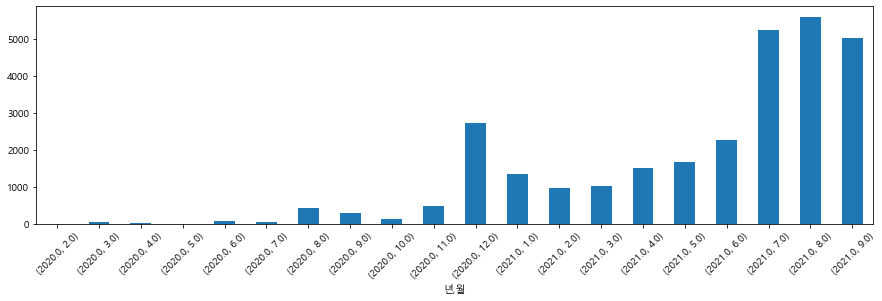

In [23]:
df_unknown = df[df["접촉력"]=='감염경로 조사중']
unknown_weekly_case = df_unknown.groupby(["년", "월"])["연번"].count()
unknown_weekly_case.plot.bar(figsize=(15,4), rot=45)

- '감염경로가 불투명한 확진자'는 2020년 12월에 증가 후에 점차 감소하다가
2021년 3월부터 증가 추세를 보이며 2021년 7월에 대폭 증가하였습니다. 

In [24]:
# 1) 전체 확진수 데이터프레임
all_weekly_case = df[["년", "주"]].value_counts().to_frame()
all_weekly_case.columns = ["전체확진수"]

# 2) 감염경로가 불명확한 확진수 데이터프레임
unknown_weekly_case = df_unknown[["년", "주"]].value_counts().to_frame()
unknown_weekly_case.columns = ["불명확진수"]

In [25]:
unknown_case = all_weekly_case.merge(unknown_weekly_case, left_index=True, right_index=True)
unknown_case = unknown_case.sort_index()
unknown_case

전체확진수  불명확진수
년      주                 
2020.0 9.0      61      4
       10.0     38      3
       11.0    124      8
       12.0     76     18
       13.0    105      8
...            ...    ...
2021.0 35.0   3759   1505
       36.0   4363   1769
       37.0   4839   1990
       38.0    676    242
       53.0    768    231

[80 rows x 2 columns]

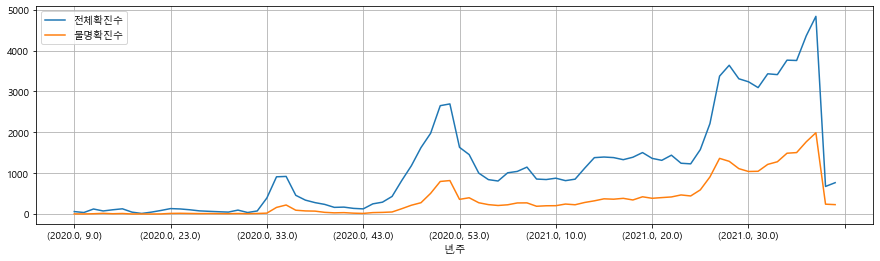

In [26]:
unknown_case.plot(figsize=(15,4))
plt.grid(True)

- 감염경로가 불투명한 확진자는 주로 전체 확진자수와 비슷한 경향을 띄고 있음을 알 수 있습니다.
- 확진자수가 증가함에 따라 감염경로를 조사할 수 있는 역학 조사 인력 부족이나 올바른 이동 동선을 제공하지 않는 문제 등에도 대응이 필요할 것이라 예측할 수 있습니다.

#### 전체 확진자 수 중에 불명확한 확진자 수 비율

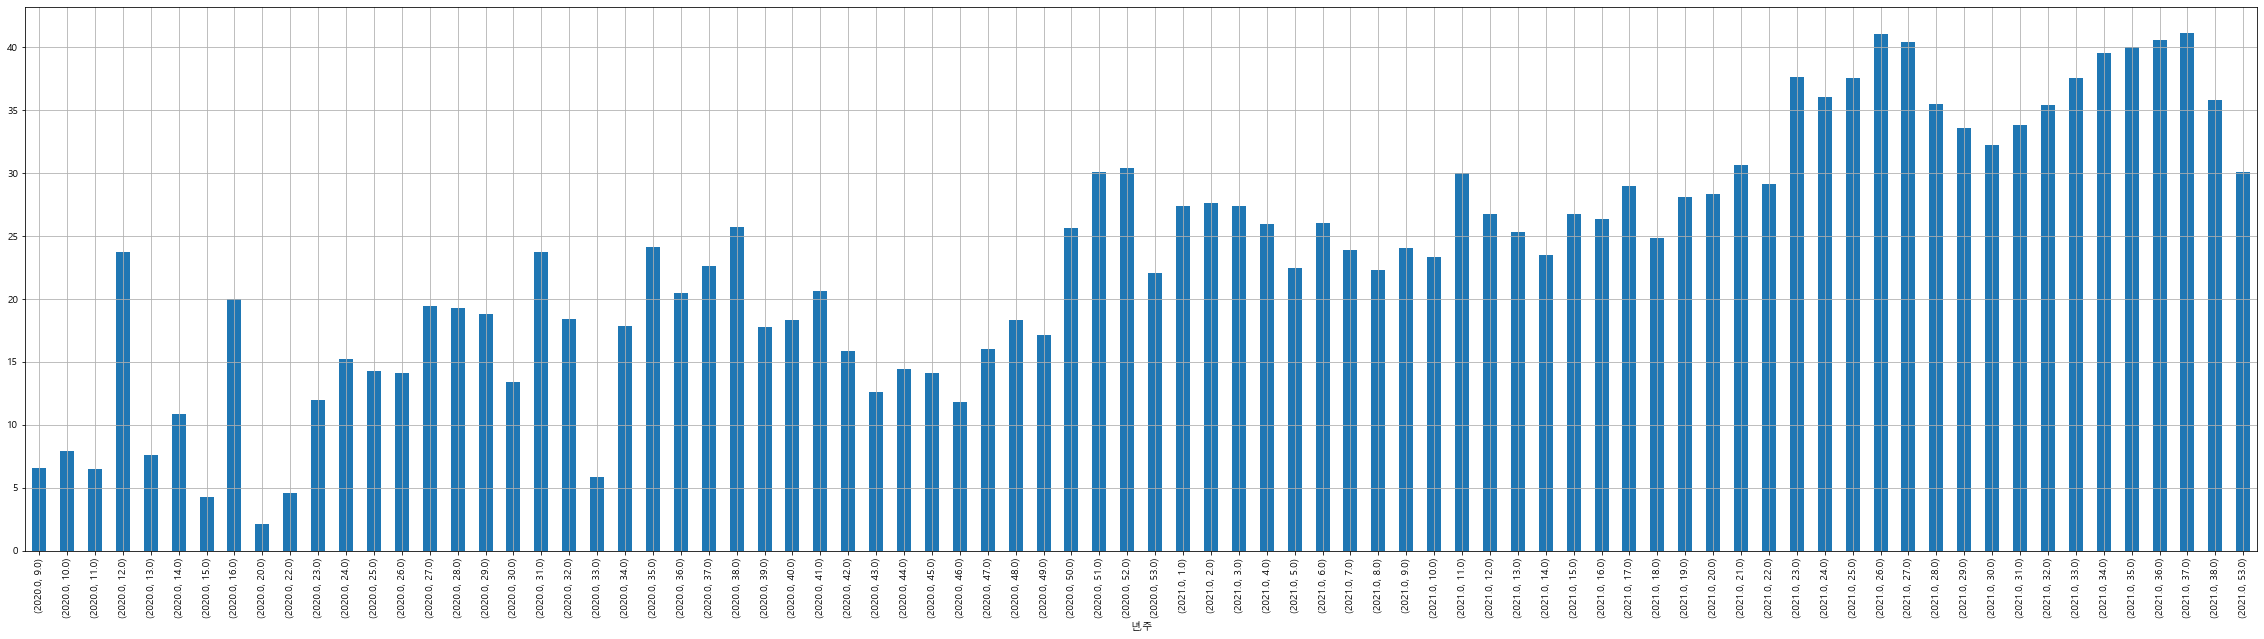

In [27]:
unknown_case["확인중비율"] = (unknown_case["불명확진수"] / unknown_case["전체확진수"]) * 100
unknown_case["확인중비율"].plot.bar(figsize=(40,10))
plt.grid(True)

- 전반적으로 감염경로가 불명한 확진자 비율이 크고 작음을 반복하다가 2020년 12월 이후에는 그 비율이 지속해서 큰 상태임을 확인할 수 있습니다.

### 퇴원, 사망 여부 분석

In [28]:
df["퇴원"] = df["퇴원현황"].str.contains("퇴원", na=False)
df["사망"] = df["퇴원현황"].str.contains("사망", na=False)

In [29]:
df["퇴원"].value_counts(normalize=True)

True     0.865548
False    0.134452
Name: 퇴원, dtype: float64

In [30]:
df["사망"].value_counts(normalize=True)

False    0.993381
True     0.006619
Name: 사망, dtype: float64

퇴원, 사망 비율

- 퇴원 비율: 약 87%

- 사망 비율: 약 0.6%


대체로 순조롭게 퇴원하고 있으며, 사망 확률도 매우 낮음을 알 수 있습니다.

### 가장 오래 입원 중인 서울 거주 환자

In [31]:
df_seoul = df[(df["퇴원"]==False) & (df["사망"]==False)].tail()

In [32]:
df_seoul

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,주,퇴원,사망
91969,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
92157,610.0,10524.0,2020-04-12,은평구,-,타시도 확진자 접촉,NaN,2020.0,4.0,15.0,False,False
92158,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
92166,602.0,10504.0,2020-04-11,은평구,-,타시도 확진자 접촉,NaN,2020.0,4.0,15.0,False,False
92167,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False


데이터 수집 시점(2021-09-21)을 기준으로 기타확진자 접촉자'에 접촉하여 2021년 4월 20일에 확진 판정을 받은 양천구 거주 환자가 가장 오랜 기간 입원 중이었습니다. 

### 여행력 별 확진자 분석

In [33]:
# 전처리를 수행할 때, 새로운 칼럼을 생성한 후에 전처리 하는 것이 좋음
df["해외"] = df["여행력"] 
df["해외"] = df["해외"].replace('-', np.nan) # - 를 Nan으로 교체

# df_oversea: 해외 칼럼 데이터를 가진 경우만 필터링
df_oversea = df[df["해외"].notnull()].copy()	
df_oversea.drop(df_oversea[df_oversea["해외"]=='28238'].index, inplace=True) # 환자 번호가 잘못 들어간 row 데이터 삭제
df_oversea.drop(df_oversea[df_oversea["해외"]=='21263'].index, inplace=True) # 환자 번호가 잘못 들어간 row 데이터 삭제

In [34]:
europe = "체코,헝가리,오스트리아,이탈리아,프랑스,모로코,독일,스페인,영국,폴란드,터키,아일랜드"
europe = europe.replace(",", "|")
south_america = "브라질,아르헨티아,칠레,볼리비아,멕시코,페루"
south_america = south_america.replace(",", "|")

df_oversea.loc[df_oversea["해외"].str.contains(europe), "해외"] = '유럽'
df_oversea.loc[df_oversea["해외"].str.contains(south_america), "해외"] = '남미'
df_oversea.loc[df_oversea["해외"].str.contains('중국|우한'), "해외"] = '중국'
df_oversea.loc[df_oversea["해외"].str.contains('아랍에미리트'), "해외"] = 'UAE'
df_oversea.loc[df_oversea["해외"].str.contains('필리핀'), "해외"] = '필리핀'
df_oversea.loc[df_oversea["해외"].str.contains('미국'), "해외"] = '미국'

df_oversea["해외"]

89            유럽
188           몽골
314      사우디아라비아
921           미국
1012          미국
          ...   
92760        아시아
92761         중국
92765         중국
92767         중국
92768         중국
Name: 해외, Length: 1680, dtype: object

In [35]:
day_oversea = df_oversea.groupby(["확진일", "해외"])["연번"].count()
day_oversea

확진일         해외     
2020-01-24  중국         1
2020-01-30  중국         2
2020-02-02  중국         1
2020-02-05  아시아        1
2020-02-06  중국         2
                      ..
2021-09-19  미국         2
            싱가폴        1
2021-09-20  몽골         1
            사우디아라비아    1
            유럽         1
Name: 연번, Length: 1211, dtype: int64

In [36]:
day_oversea_cumsum = day_oversea.groupby(level=[1]).cumsum()
day_oversea_cumsum

확진일         해외     
2020-01-24  중국           1
2020-01-30  중국           3
2020-02-02  중국           4
2020-02-05  아시아          1
2020-02-06  중국           6
                      ... 
2021-09-19  미국         463
            싱가폴          2
2021-09-20  몽골          29
            사우디아라비아      4
            유럽         304
Name: 연번, Length: 1211, dtype: int64

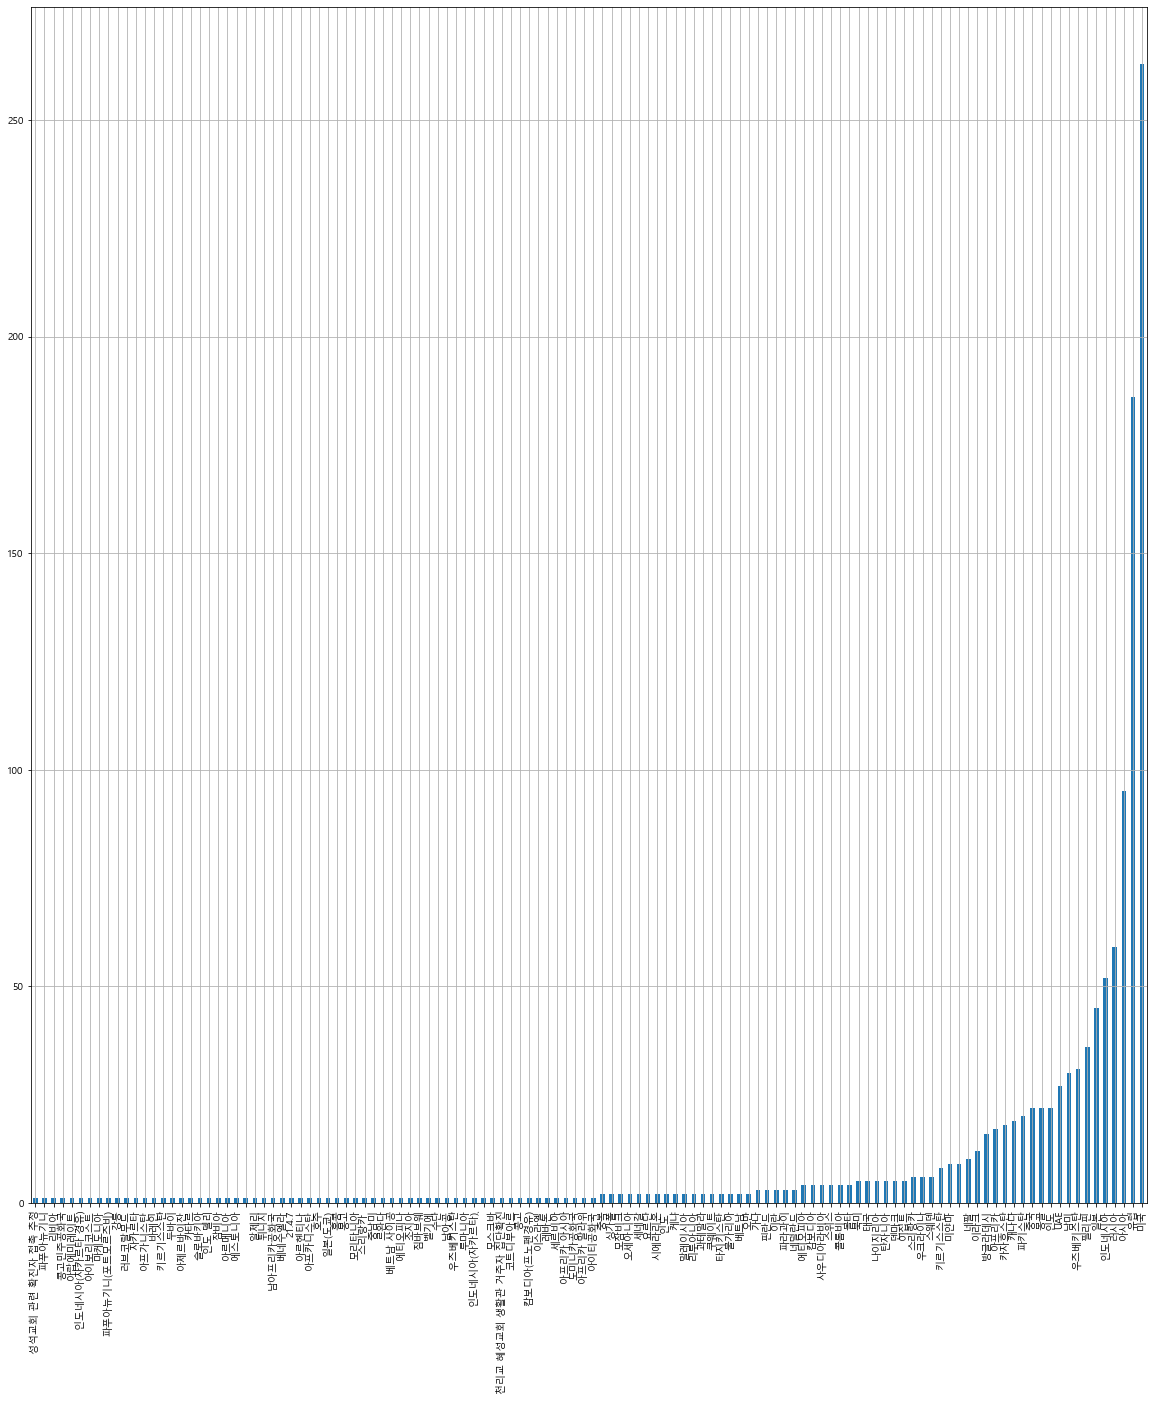

In [37]:
df_day_oversea_cumsum =day_oversea_cumsum.reset_index()
df_day_oversea_cumsum = df_day_oversea_cumsum.rename(columns={"연번": "누적확진수"})
oversea_count = df_day_oversea_cumsum["해외"].value_counts()
oversea_count.sort_values().plot.bar(figsize=(20,22))
plt.grid(True)

- 미국 , 유럽, 아시아, 인도네시아 순으로 누적확진자가 가장 많다는 것을 알 수 있습니다. 

In [38]:
df_day_oversea_top_10 = df_day_oversea_cumsum.groupby("해외")["누적확진수"].max().sort_values(ascending=False)[:10]
df_day_oversea_top_10 = df_day_oversea_top_10.index
df_day_oversea_top_10

Index(['미국', '유럽', '아시아', '인도네시아', '러시아', '일본', '우즈베키스탄', '필리핀', '남미', 'UAE'], dtype='object', name='해외')

<AxesSubplot:xlabel='확진일'>

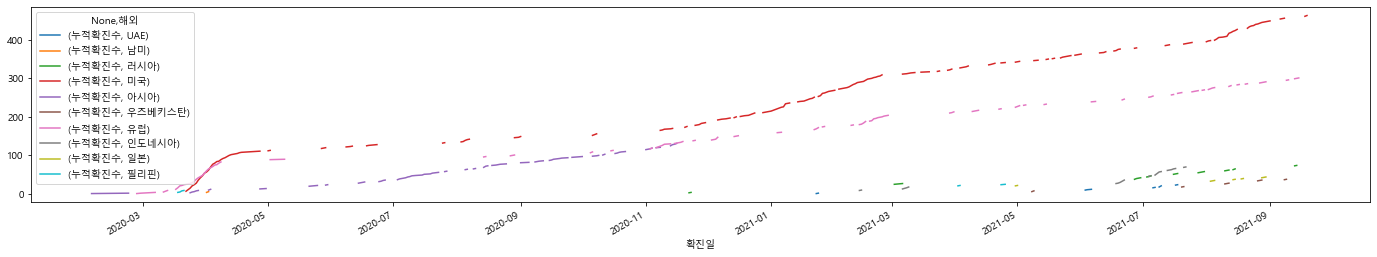

In [39]:
df_day_oversea_cumsum = df_day_oversea_cumsum[df_day_oversea_cumsum["해외"].isin(df_day_oversea_top_10)]
df_day_oversea_cumsum = df_day_oversea_cumsum.set_index("확진일")
df_day_oversea_cumsum.pivot(columns="해외").plot(figsize=(24,4))

- '아시아'를 여행력으로 가진 확진자가 2020년 1월에 가장 먼저 발생한 것으로 확인됩니다.

- 시간이 흐를수록 미국을 여행력으로 가진 누적 확진수가 증가하며 유럽을 여행력으로 가진 누적 확진자수가 뒤를 따릅니다.


<AxesSubplot:xlabel='확진일'>

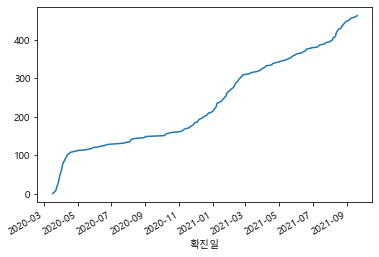

In [40]:
df_day_oversea_cumsum[df_day_oversea_cumsum["해외"]=='미국']["누적확진수"].plot()

누적 확진자수가 가장 많은 '미국'을 선 그래프로 시각화합니다.

- 2020년 3월 이후로 누적 확진수가 크게 한 번 증가합니다.
- 이후로 원만하게 증가하다가 12월 이후로 급증합니다. 

##### 거주지와 여행력 국가별 확진자 분석

<AxesSubplot:>

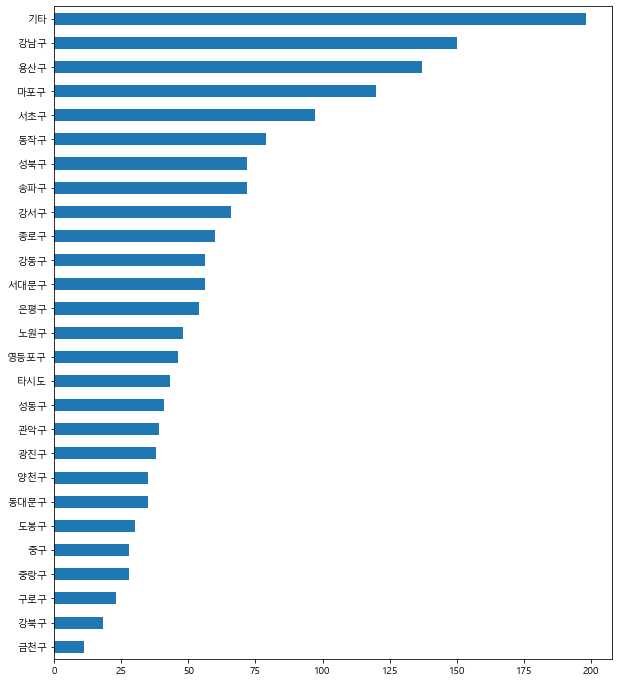

In [41]:
oversea_count_gu = df_oversea["거주지"].value_counts()
oversea_count_gu.sort_values().plot.barh(figsize=(10,12))

- 여행력을 가진 확진자는 강남구에 가장 많이 거주하고 있으며, 기타 지역, 용산구, 마포구 순으로 많이 거주하고 있습니다

### 거주지 별 전체 확진자 수 및 여행력을 가진 확진자 수 분석

In [42]:
# 거주지 별 전체 확진자
all_count_gu = df["거주지"].value_counts()
df_all_gu = all_count_gu.to_frame()
df_all_gu.columns = ["전체확진수"]


# 거주지 별 여행력을 가진 확진자 
oversea_count_gu = df_oversea["거주지"].value_counts()
df_oversea_gu = oversea_count_gu.to_frame()
df_oversea_gu.columns = ["여행력존재확진수"]

In [43]:
df_all_oversea_case = df_all_gu.merge(df_oversea_gu, left_index=True, right_index=True)
df_all_oversea_case

,전체확진수,여행력존재확진수
강남구,6577,150
송파구,5763,72
관악구,5109,39
타시도,4384,43
영등포구,4134,46
서초구,4110,97
강서구,4101,66
은평구,4041,54
동작구,3906,79
구로구,3736,23


<AxesSubplot:>

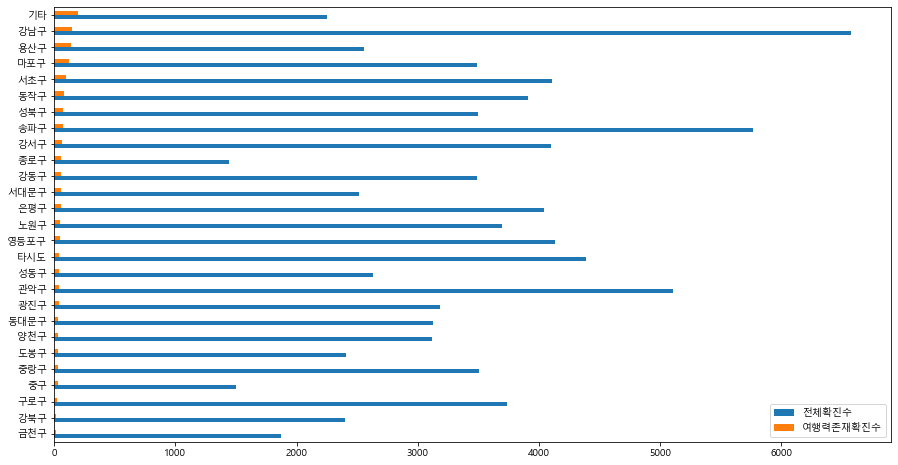

In [44]:
df_all_oversea_case.sort_values(by="여행력존재확진수").plot.barh(figsize=(15,8))

- 전체 확진자 중에 여행력이 존재하는 확진자 비율은 용산구, 강남구, 마포구, 서초구 순으로 많습니다

In [45]:
df_all_oversea_case["비율"] = (df_all_oversea_case["여행력존재확진수"] / df_all_oversea_case["전체확진수"])*100
df_all_oversea_case.sort_values(by="비율", ascending=False)

,전체확진수,여행력존재확진수,비율
기타,2253,198,8.788282
용산구,2553,137,5.366236
종로구,1443,60,4.158004
마포구,3490,120,3.438395
서초구,4110,97,2.360097
강남구,6577,150,2.280675
서대문구,2511,56,2.230187
성북구,3497,72,2.058908
동작구,3906,79,2.022529
중구,1497,28,1.870407


#### 여행력을 가진 확진자의 월별 발생빈도 

<AxesSubplot:xlabel='월'>

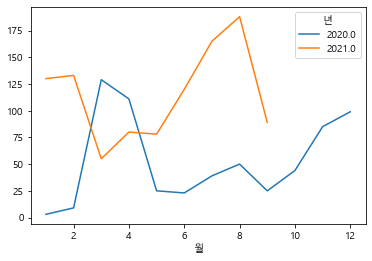

In [46]:
df_oversea.groupby(["월", "년"])["연번"].count().unstack().plot()

- 2020년 3월부터는 여행력을 가진 확진자수가 급증한 이후에 감소세를 보입니다.
- 2021년 5월부터 다시 급증합니다.

### 여행력을 가진 확진자의 거주지별 국가 분석 

#### groupby와 pivot table 이용

#### 2020년과 2021년 따로 

In [47]:
df_oversea_2020 = df_oversea[df_oversea["년"]==2020]
top_country_2020 = df_oversea_2020["해외"].value_counts()[:10].index

group_oversea_gu_2020 = df_oversea_2020[df_oversea_2020["해외"].isin(top_country_2020)].groupby(["해외", "거주지"])["연번"].count().unstack()
group_oversea_gu_2020.fillna(0).astype(int).style.background_gradient("Blues")

거주지,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도
해외,,,,,,,,,,,,,,,,,,,,,,,,,,,
남미,2,1,1,1,1,0,0,0,2,1,3,1,3,3,0,1,0,0,1,0,0,0,2,0,0,0,1
러시아,0,1,0,0,1,0,0,2,0,1,0,0,0,3,1,0,0,0,0,0,0,1,1,0,2,0,0
미국,38,11,3,6,5,3,2,0,10,3,6,4,4,10,5,22,12,9,14,4,3,11,5,6,1,5,11
아시아,4,6,0,7,4,1,0,0,23,6,2,3,10,7,10,2,3,3,9,6,0,15,5,4,4,3,2
아프리카,0,1,0,0,1,0,0,0,4,1,2,0,0,1,1,0,0,0,1,0,0,2,0,1,1,0,1
유럽,19,5,1,4,6,5,1,0,16,4,3,2,8,13,5,12,3,6,13,1,4,12,4,2,2,2,4
일본,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
중국,0,0,0,2,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,6,0,0,0,1,2
캐나다,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0


In [48]:
group_oversea_gu_2020 = pd.pivot_table(df_oversea_2020[df_oversea_2020["해외"].isin(top_country_2020)], index="해외", columns="거주지", values="연번", aggfunc='count', fill_value=0)
group_oversea_gu_2020.style.background_gradient(cmap="Blues")

거주지,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도
해외,,,,,,,,,,,,,,,,,,,,,,,,,,,
남미,2,1,1,1,1,0,0,0,2,1,3,1,3,3,0,1,0,0,1,0,0,0,2,0,0,0,1
러시아,0,1,0,0,1,0,0,2,0,1,0,0,0,3,1,0,0,0,0,0,0,1,1,0,2,0,0
미국,38,11,3,6,5,3,2,0,10,3,6,4,4,10,5,22,12,9,14,4,3,11,5,6,1,5,11
아시아,4,6,0,7,4,1,0,0,23,6,2,3,10,7,10,2,3,3,9,6,0,15,5,4,4,3,2
아프리카,0,1,0,0,1,0,0,0,4,1,2,0,0,1,1,0,0,0,1,0,0,2,0,1,1,0,1
유럽,19,5,1,4,6,5,1,0,16,4,3,2,8,13,5,12,3,6,13,1,4,12,4,2,2,2,4
일본,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
중국,0,0,0,2,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,6,0,0,0,1,2
캐나다,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0


2020년 - 
미국, 유럽을 여행력으로 가진 확진자가 가장 많으며, 전반적으로 다양한 지역에 거주하는 것을 알 수 있습니다.

In [49]:
df_oversea_2021 = df_oversea[df_oversea["년"]==2021]
top_country_2021 = df_oversea_2021["해외"].value_counts()[:10].index

group_oversea_gu_2021 = df_oversea_2021[df_oversea_2021["해외"].isin(top_country_2020)].groupby(["해외", "거주지"])["연번"].count().unstack()
group_oversea_gu_2021.fillna(0).astype(int).style.background_gradient("Blues")

거주지,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도
해외,,,,,,,,,,,,,,,,,,,,,,,,,,,
남미,1,0,0,0,0,0,0,0,2,1,0,0,2,4,1,0,0,0,0,1,0,1,1,0,0,0,0
러시아,5,0,0,4,2,1,1,1,7,1,0,2,6,6,1,3,0,6,0,4,1,5,0,2,3,0,2
미국,38,11,3,10,3,1,4,0,36,3,1,3,14,13,8,21,9,12,8,6,12,11,11,9,0,1,2
유럽,7,3,1,8,2,2,3,3,28,8,1,1,6,9,6,9,2,5,3,3,5,13,3,11,3,0,2
일본,3,1,1,0,0,2,1,0,4,5,0,2,2,5,2,2,0,4,0,0,0,2,0,2,1,0,2
중국,0,0,0,1,1,1,2,0,0,0,0,0,1,0,2,0,0,0,0,0,4,0,0,0,2,0,0
캐나다,1,0,0,2,0,0,0,0,1,1,0,0,0,1,0,2,0,0,0,1,0,0,1,0,1,1,0
필리핀,3,1,0,0,0,5,0,0,5,1,1,0,0,1,0,1,0,1,1,1,0,1,1,1,0,0,1


In [50]:
group_oversea_gu_2021 = pd.pivot_table(df_oversea_2021[df_oversea_2021["해외"].isin(top_country_2020)], index="해외", columns="거주지", values="연번", aggfunc='count', fill_value=0)
group_oversea_gu_2021.style.background_gradient(cmap="Blues")

거주지,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도
해외,,,,,,,,,,,,,,,,,,,,,,,,,,,
남미,1,0,0,0,0,0,0,0,2,1,0,0,2,4,1,0,0,0,0,1,0,1,1,0,0,0,0
러시아,5,0,0,4,2,1,1,1,7,1,0,2,6,6,1,3,0,6,0,4,1,5,0,2,3,0,2
미국,38,11,3,10,3,1,4,0,36,3,1,3,14,13,8,21,9,12,8,6,12,11,11,9,0,1,2
유럽,7,3,1,8,2,2,3,3,28,8,1,1,6,9,6,9,2,5,3,3,5,13,3,11,3,0,2
일본,3,1,1,0,0,2,1,0,4,5,0,2,2,5,2,2,0,4,0,0,0,2,0,2,1,0,2
중국,0,0,0,1,1,1,2,0,0,0,0,0,1,0,2,0,0,0,0,0,4,0,0,0,2,0,0
캐나다,1,0,0,2,0,0,0,0,1,1,0,0,0,1,0,2,0,0,0,1,0,0,1,0,1,1,0
필리핀,3,1,0,0,0,5,0,0,5,1,1,0,0,1,0,1,0,1,1,1,0,1,1,1,0,0,1


2021년 또한
미국, 유럽을 여행력으로 가진 확진자가 가장 많으며, 전반적으로 다양한 지역에 거주하는 것을 알 수 있습니다.